<a href="https://colab.research.google.com/github/Kudasai03/DataVisualization/blob/main/BIRCH_Sourcecode_Nhom8_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/Kudasai03/Data-visualization.git

Cloning into 'Data-visualization'...


In [7]:
!git add .
!git commit -m "Thêm các thay đổi"


fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


# **1. CHUẨN BỊ TÀI NGUYÊN**

In [3]:
import matplotlib.pyplot         as plt
import numpy                     as np
import pandas                    as pd
import scipy.stats               as stats
import seaborn                   as sns
import statsmodels.api           as sm
import plotly.express as px
import plotly.io as pio
import gdown
from IPython.display import HTML

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick
import scipy.cluster.hierarchy as shc
import matplotlib.patches as patches

from matplotlib.patches import Rectangle
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
from yellowbrick.contrib.wrapper import wrap

In [ ]:
# !pip install --upgrade --no-cache-dir gdown

In [ ]:
# !pip install -U --no-cache-dir gdown --pre

In [ ]:
!gdown 1SzSVF6ii25W3wDI7-vRdnablknlnYFVbn4XPSGZkKro

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1SzSVF6ii25W3wDI7-vRdnablknlnYFVbn4XPSGZkKro 



In [ ]:
df = pd.read_excel("/content/Customer_Data.xlsx")

# **2. KHÁM PHÁ DỮ LIỆU**

## **Phân tích đơn biến**

In [ ]:
df1 = df.drop('cust_id', axis=1)

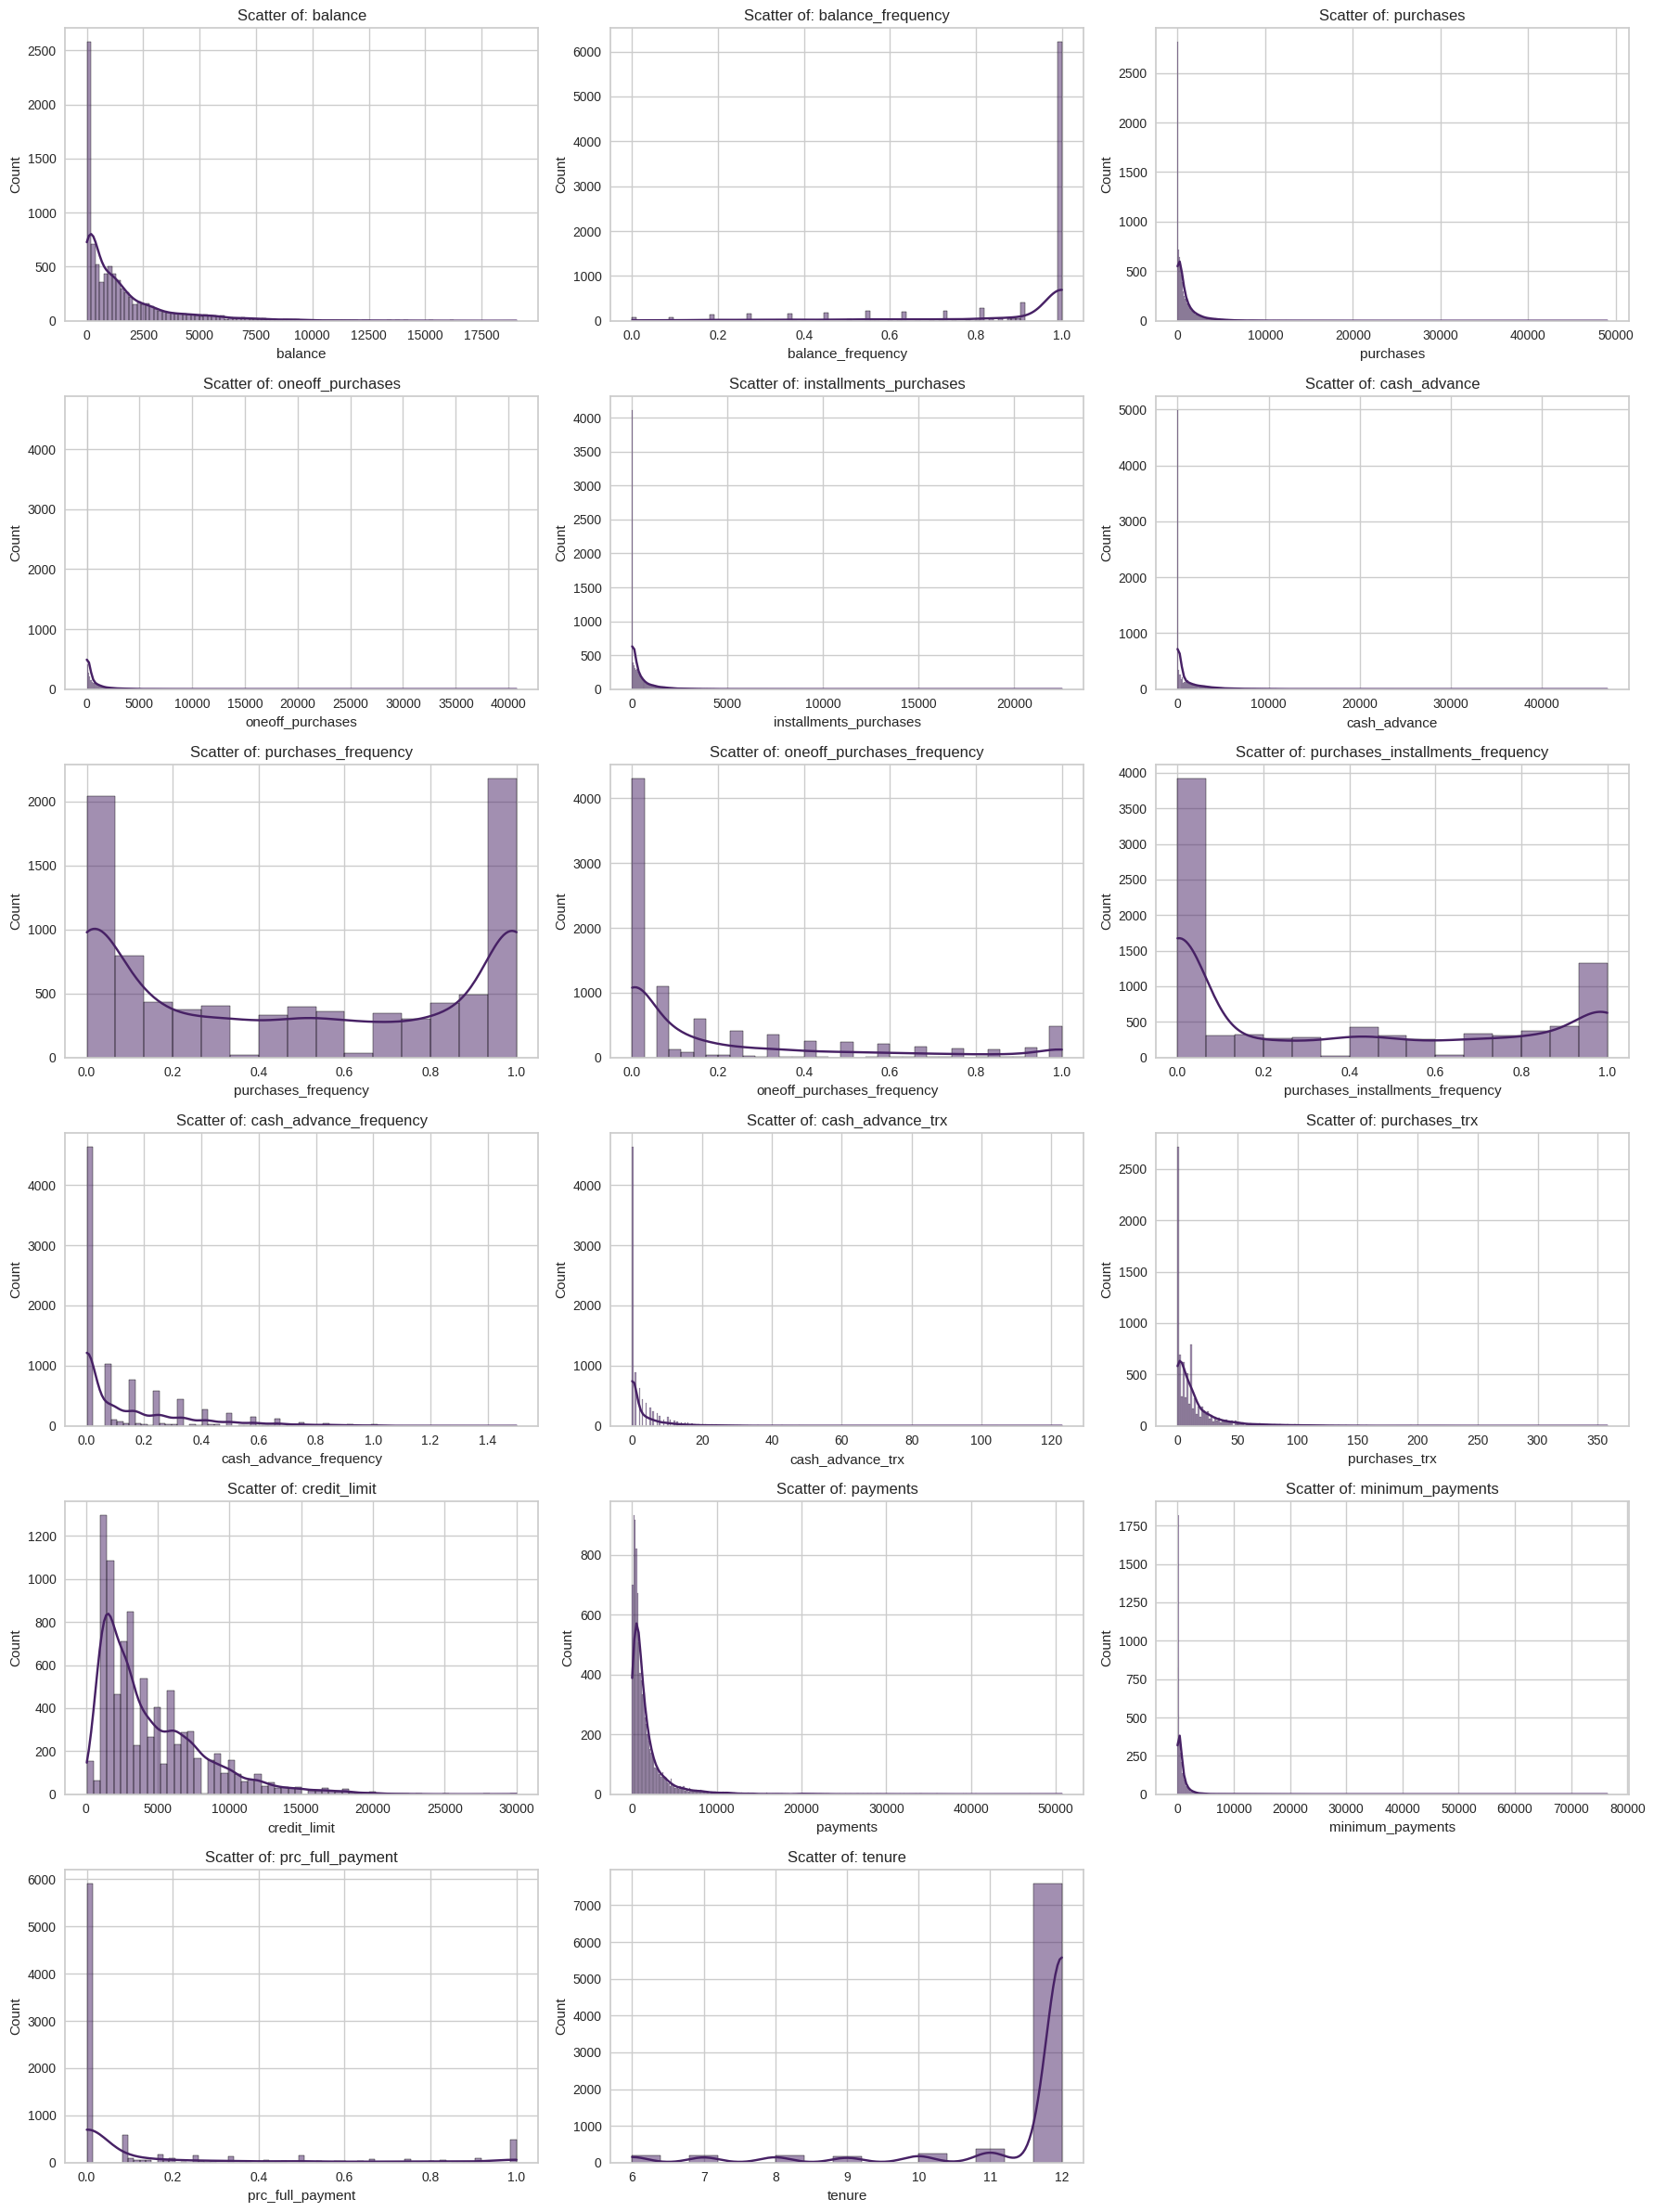

In [ ]:
n_rows = 6
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(df1.columns):
            ax_i = ax[r, c]
            col = df1.columns[i]
            sns.histplot(df1[col], kde=True, ax=ax_i)
            ax_i.set_title(f'Scatter of: {col}')
        else:
            ax[r, c].axis('off')
plt.tight_layout()
plt.show()

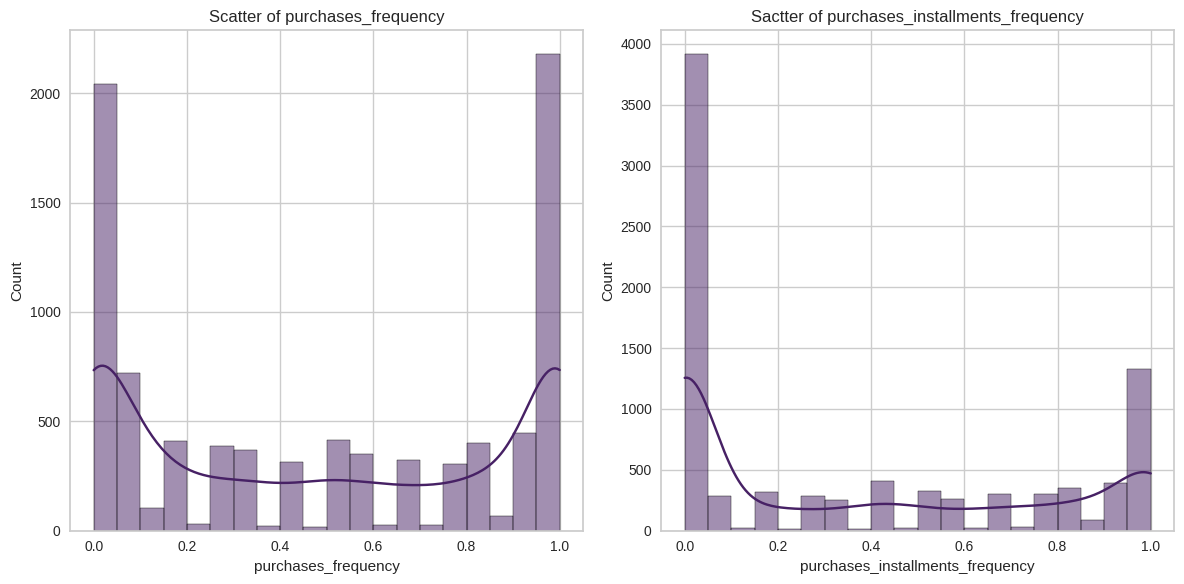

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['purchases_frequency'], bins=20, kde=True)
plt.title('Scatter of purchases_frequency')
plt.xlabel('purchases_frequency')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df1['purchases_installments_frequency'], bins=20, kde=True)
plt.title('Sactter of purchases_installments_frequency')
plt.xlabel('purchases_installments_frequency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## **Phân tích đa biến**

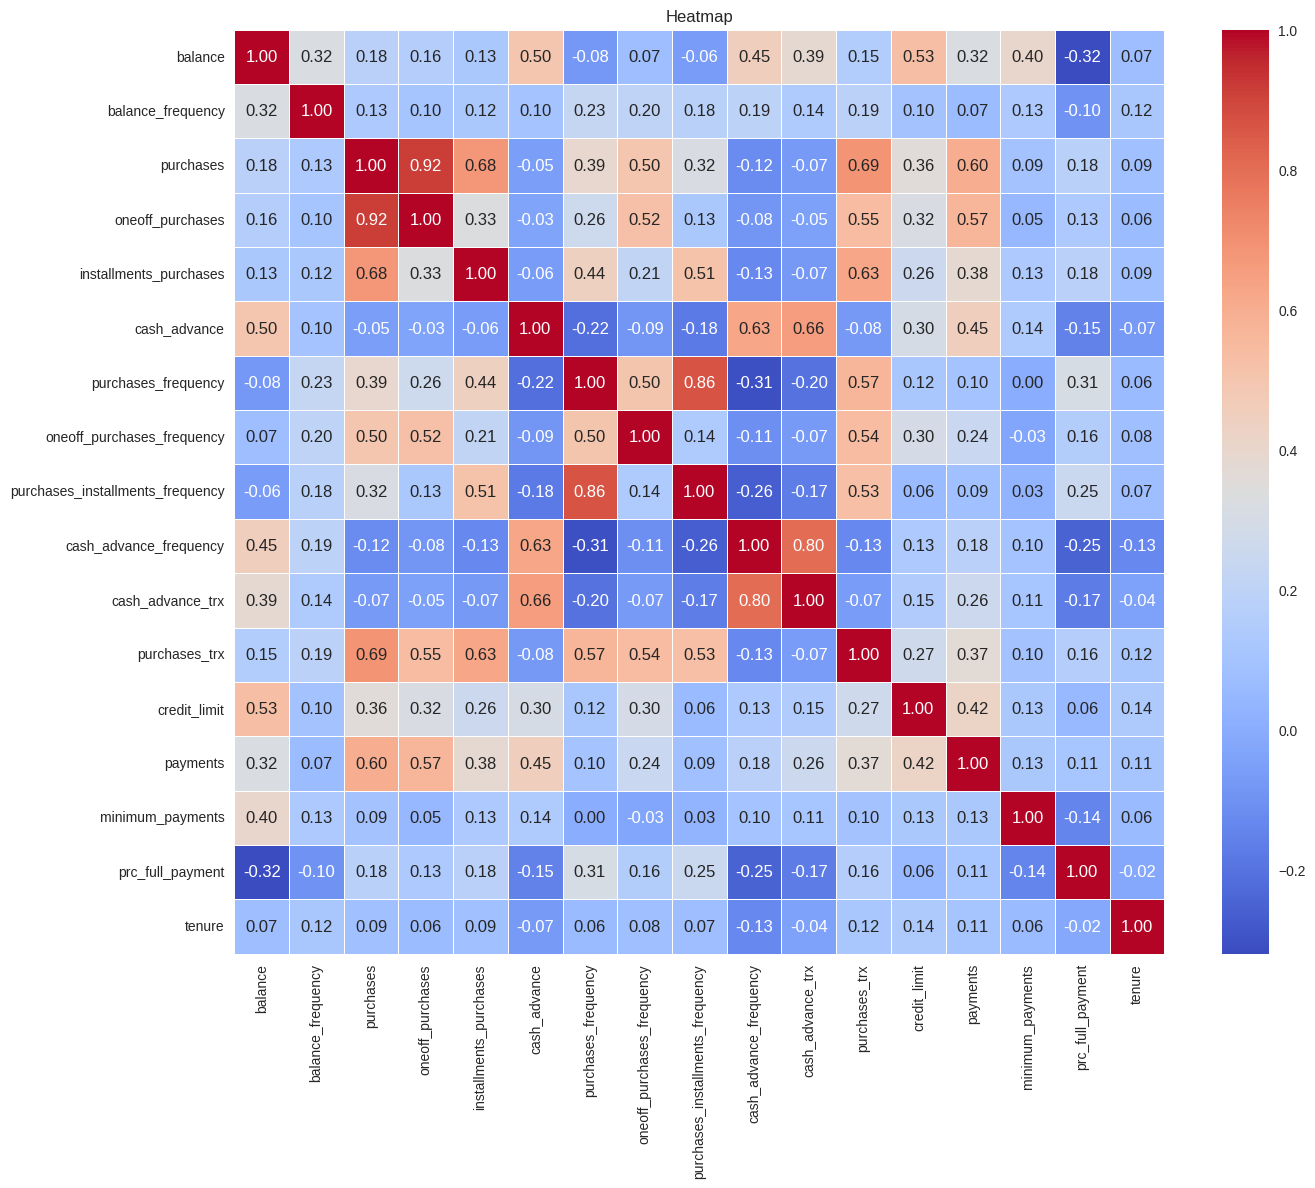

In [ ]:
correlation_matrix = df1.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.show()

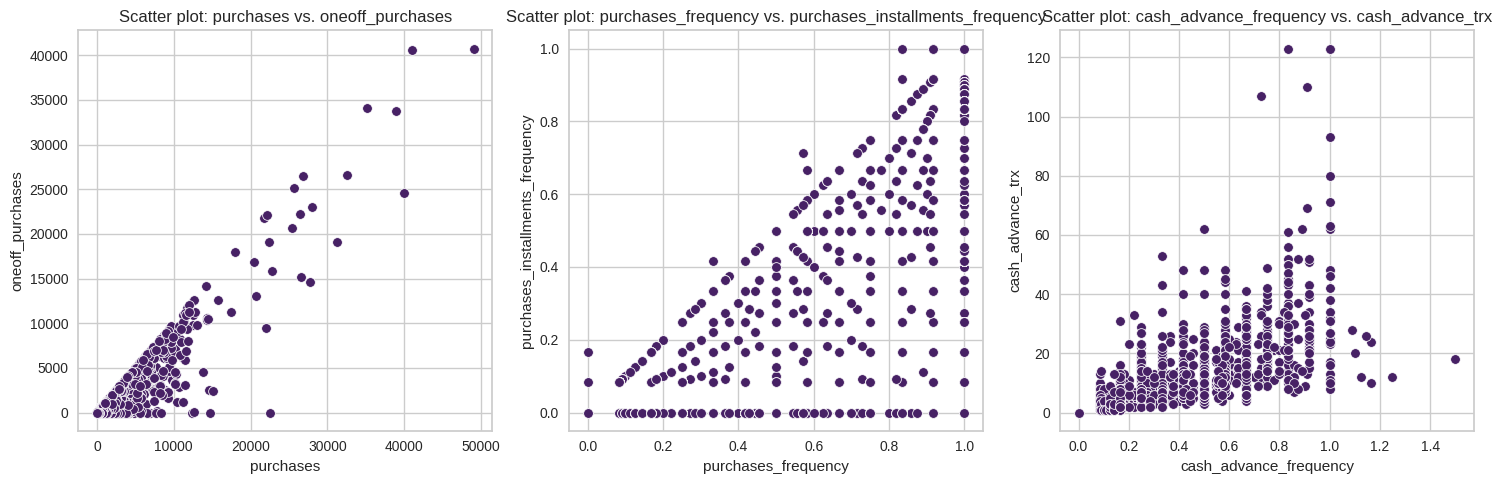

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='purchases', y='oneoff_purchases', data=df1)
plt.title('Scatter plot: purchases vs. oneoff_purchases')


plt.subplot(1, 3, 2)
sns.scatterplot(x='purchases_frequency', y='purchases_installments_frequency', data=df1)
plt.title('Scatter plot: purchases_frequency vs. purchases_installments_frequency')


plt.subplot(1, 3, 3)
sns.scatterplot(x='cash_advance_frequency', y='cash_advance_trx', data=df1)
plt.title('Scatter plot: cash_advance_frequency vs. cash_advance_trx')
plt.tight_layout()
plt.show()

In [ ]:
# from scipy.stats import pearsonr
# correlation_coefficient, p_value = pearsonr(df.purchases, df.oneoff_purchases)

# print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
# print(f'P-value: {p_value}')
# if p_value < 0.05:
#     print('Có mối tương quan tuyến tính giữa 2 biến')
# else:
#     print('Không có mối tương quan tuyến tính giữa 2 biến')


In [ ]:
# from scipy.stats import pearsonr
# correlation_coefficient, p_value = pearsonr(df.cash_advance_frequency, df.cash_advance_trx)

# print(f'Pearson Correlation Coefficient: {correlation_coefficient}')
# print(f'P-value: {p_value}')
# if p_value < 0.05:
#     print('Có mối tương quan tuyến tính giữa 2 biến')
# else:
#     print('Không có mối tương quan tuyến tính giữa 2 biến')


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Danh sách các cặp biến cần kiểm tra
variable_pairs = [('purchases', 'oneoff_purchases'),
                  ('purchases_frequency', 'purchases_installments_frequency'),
                  ('cash_advance_frequency', 'cash_advance_trx')]


# Tính toán VIF và hiển thị kết quả
for pair in variable_pairs:
    x = df[list(pair)]
    correlation_coefficient = x.corr().iloc[0, 1]
    vif = pd.DataFrame()
    vif["Variable"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    # Hiển thị kết quả
    print(f"\nPair: {pair[0]} vs {pair[1]}")
    print("Correlation coefficient:", correlation_coefficient)
    print("Variance Inflation Factor (VIF):")
    print(vif)



Pair: purchases vs oneoff_purchases
Correlation coefficient: 0.9168445587151489
Variance Inflation Factor (VIF):
           Variable      VIF
0         purchases  6.88149
1  oneoff_purchases  6.88149

Pair: purchases_frequency vs purchases_installments_frequency
Correlation coefficient: 0.8629336372699634
Variance Inflation Factor (VIF):
                           Variable       VIF
0               purchases_frequency  7.001987
1  purchases_installments_frequency  7.001987

Pair: cash_advance_frequency vs cash_advance_trx
Correlation coefficient: 0.7995607573993837
Variance Inflation Factor (VIF):
                 Variable       VIF
0  cash_advance_frequency  3.374459
1        cash_advance_trx  3.374459


## **Drop column**

In [ ]:
df['cust_id'].duplicated().sum()

0

In [ ]:
df['cust_id'].nunique()

8950

- Drop cột này vì không mang giá trị thống kê

In [ ]:
df = df.drop('cust_id', axis=1)

## **Missing value**

/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning:

Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.



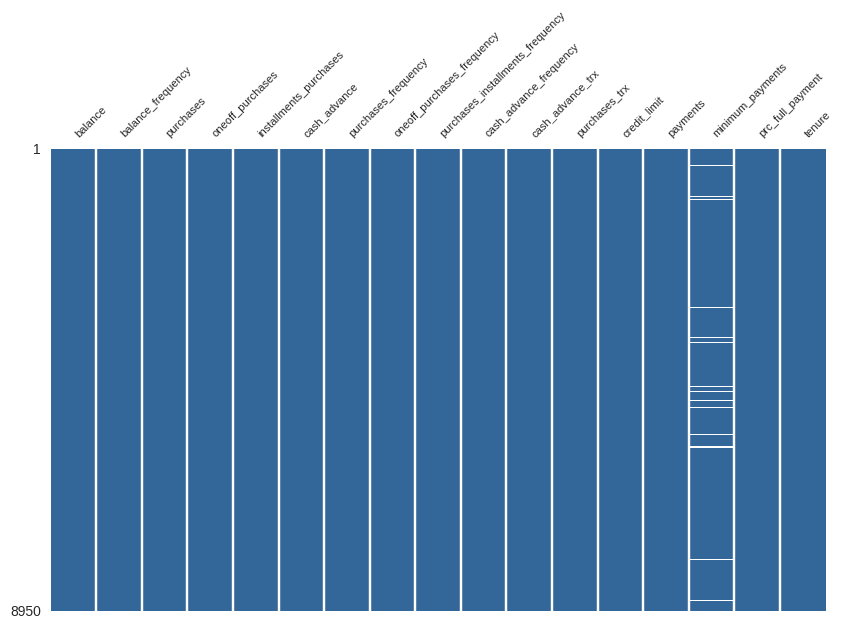

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
# Assume df is your DataFrame
fig, ax = plt.subplots(figsize=(10, 6))
msno.matrix(df, ax=ax, color=(0.2, 0.4, 0.6), fontsize=8)  # Specify fontsize
plt.show()

In [ ]:
df.isnull().sum()
missing_data_summary=pd.DataFrame({'Missing Count': df.isnull().sum(),
                                'Missing Percentage': df.isnull().mean()*100})
print(missing_data_summary)

                                  Missing Count  Missing Percentage
balance                                       0            0.000000
balance_frequency                             0            0.000000
purchases                                     0            0.000000
oneoff_purchases                              0            0.000000
installments_purchases                        0            0.000000
cash_advance                                  0            0.000000
purchases_frequency                           0            0.000000
oneoff_purchases_frequency                    0            0.000000
purchases_installments_frequency              0            0.000000
cash_advance_frequency                        0            0.000000
cash_advance_trx                              0            0.000000
purchases_trx                                 0            0.000000
credit_limit                                  1            0.011173
payments                                      0 

- Credit_limit chỉ 1/8950 => Drop


In [ ]:
# Credit_limit chỉ 1/8950 => Drop
df = df.drop(df[df.credit_limit.isna()].index, axis=0)

- Minimum_payments

In [ ]:
fig = px.histogram(df, x='minimum_payments', title="Phân phối của minimum_payments", nbins=30)
fig.update_layout(
    xaxis_title="Minimum Payments",
    yaxis_title="Tần suất",
    width=1000,
    height=600)
html_path = 'temp-plot.html'
fig.write_html(html_path)
HTML(filename=html_path)

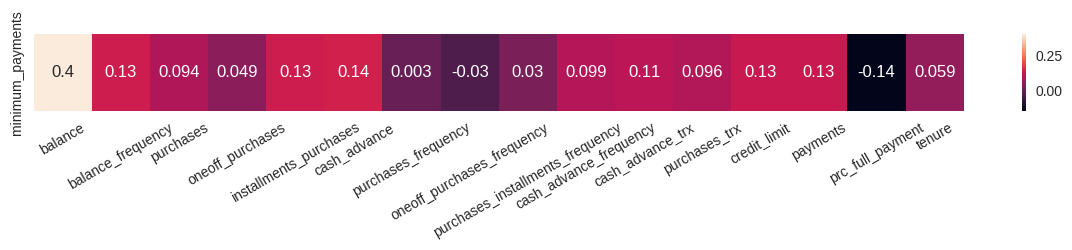

In [ ]:
# Chọn các cột không bảo gồm 'minimum_payments' và gộp với cột đó để tạo heatmap hợp lý.
selected_columns = [col for col in df.columns if col != 'minimum_payments' and col != 'cust_id']
selected_df = df[['minimum_payments'] + selected_columns]

# Vẽ heatmap tương quan
plt.figure(figsize=(15, 1))
sns.heatmap(selected_df.corr().loc[['minimum_payments'], selected_columns], fmt='.2g', annot=True)
plt.xticks(rotation=30)
plt.show()

In [ ]:
df['minimum_payments'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: minimum_payments, dtype: float64

In [ ]:
df1 = df.copy()
# Tính median của cột 'minimum_payments'
median_value = df1['minimum_payments'].median()

# Thay thế giá trị còn thiếu bằng median
df1['minimum_payments'].fillna(median_value, inplace=True)

In [ ]:
df2 = df.copy()
# Dùng nội suy tuyến tính bằng interpolate
df2['minimum_payments'] = df2.minimum_payments.interpolate()

In [ ]:
df3 = df.copy()

In [ ]:
from sklearn.impute import KNNImputer
# Tạo mô hình KNNImputer với k=5 (hoặc giá trị khác tùy chọn)
imputer = KNNImputer()

# Chia dữ liệu thành dữ liệu có và không có giá trị còn thiếu
data_with_values = df3.dropna(subset=['minimum_payments'])
data_missing_values = df3[df3['minimum_payments'].isnull()]

# Huấn luyện mô hình KNNImputer trên dữ liệu có giá trị
imputer.fit(data_with_values.drop('minimum_payments', axis=1))

# Dự đoán và điền giá trị còn thiếu
imputed_values = imputer.transform(data_missing_values.drop('minimum_payments', axis=1))
data_missing_values['minimum_payments'] = imputed_values

# Gộp dữ liệu đã điền giá trị còn thiếu vào DataFrame chính
df3.loc[df3['minimum_payments'].isnull(), 'minimum_payments'] = data_missing_values['minimum_payments'].values

<ipython-input-104-ccda77dd0065>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



=> Có thể thấy được khi sử dụng cả 2 cách thì sự tương quan qua heatmap của minimun_payments và các biến khác là không có nhiều sự thay đổi. Tuy nhiên

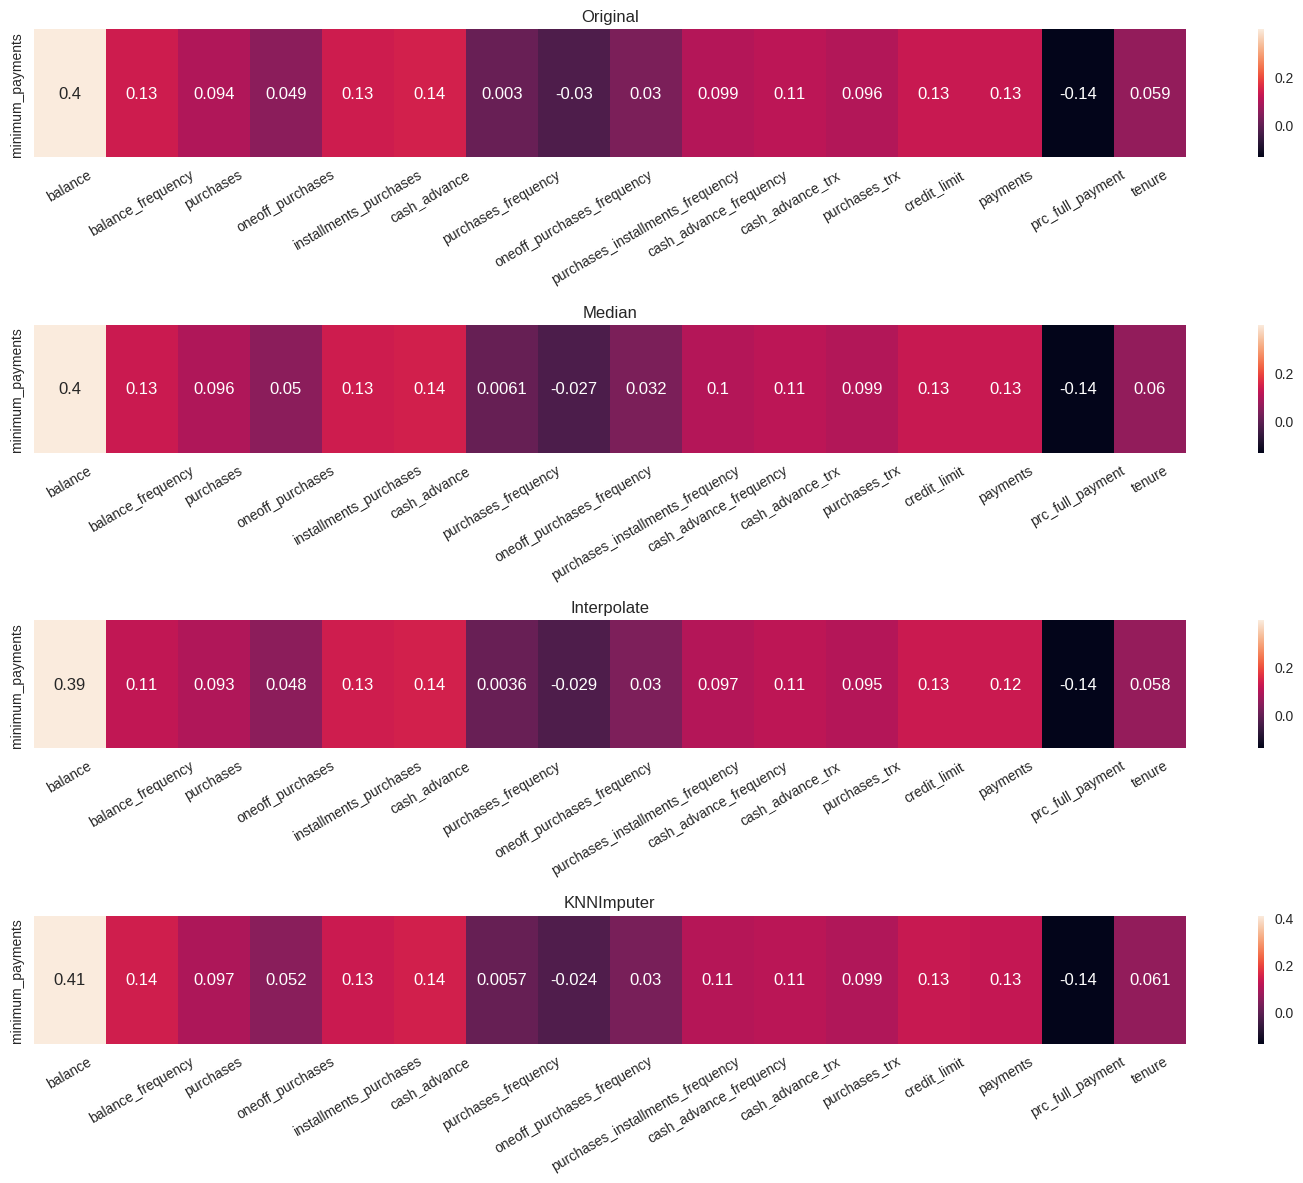

In [ ]:
dataframes = [df, df1, df2, df3]
names = ['Original', 'Median', 'Interpolate', 'KNNImputer']

fig, axes = plt.subplots(len(dataframes), 1, figsize=(15, 3 * len(dataframes)))
for i, (current_df, df_name) in enumerate(zip(dataframes, names)):  # Sửa tên biến df thành current_df
    # Chọn các cột không bao gồm 'minimum_payments' và gộp với cột đó để tạo heatmap
    selected_columns = [col for col in current_df.columns if col != 'minimum_payments']
    selected_df = current_df[['minimum_payments'] + selected_columns]

    # Vẽ heatmap
    heatmap = sns.heatmap(selected_df.corr().loc[['minimum_payments'], selected_columns], fmt='.2g', annot=True, ax=axes[i])
    heatmap.set_title(df_name)
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

# Chia dữ liệu thành dữ liệu có và không có giá trị còn thiếu
data_with_values = df.dropna(subset=['minimum_payments'])
data_missing_values = df[df['minimum_payments'].isnull()]

# Huấn luyện mô hình KNNImputer trên dữ liệu có giá trị
imputer.fit(data_with_values.drop('minimum_payments', axis=1))

# Dự đoán và điền giá trị còn thiếu
imputed_values = imputer.transform(data_missing_values.drop('minimum_payments', axis=1))
data_missing_values['minimum_payments'] = imputed_values

# Gộp dữ liệu đã điền giá trị còn thiếu vào DataFrame chính
df.loc[df['minimum_payments'].isnull(), 'minimum_payments'] = data_missing_values['minimum_payments'].values

<ipython-input-106-2aed6ba0954e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Outliers**

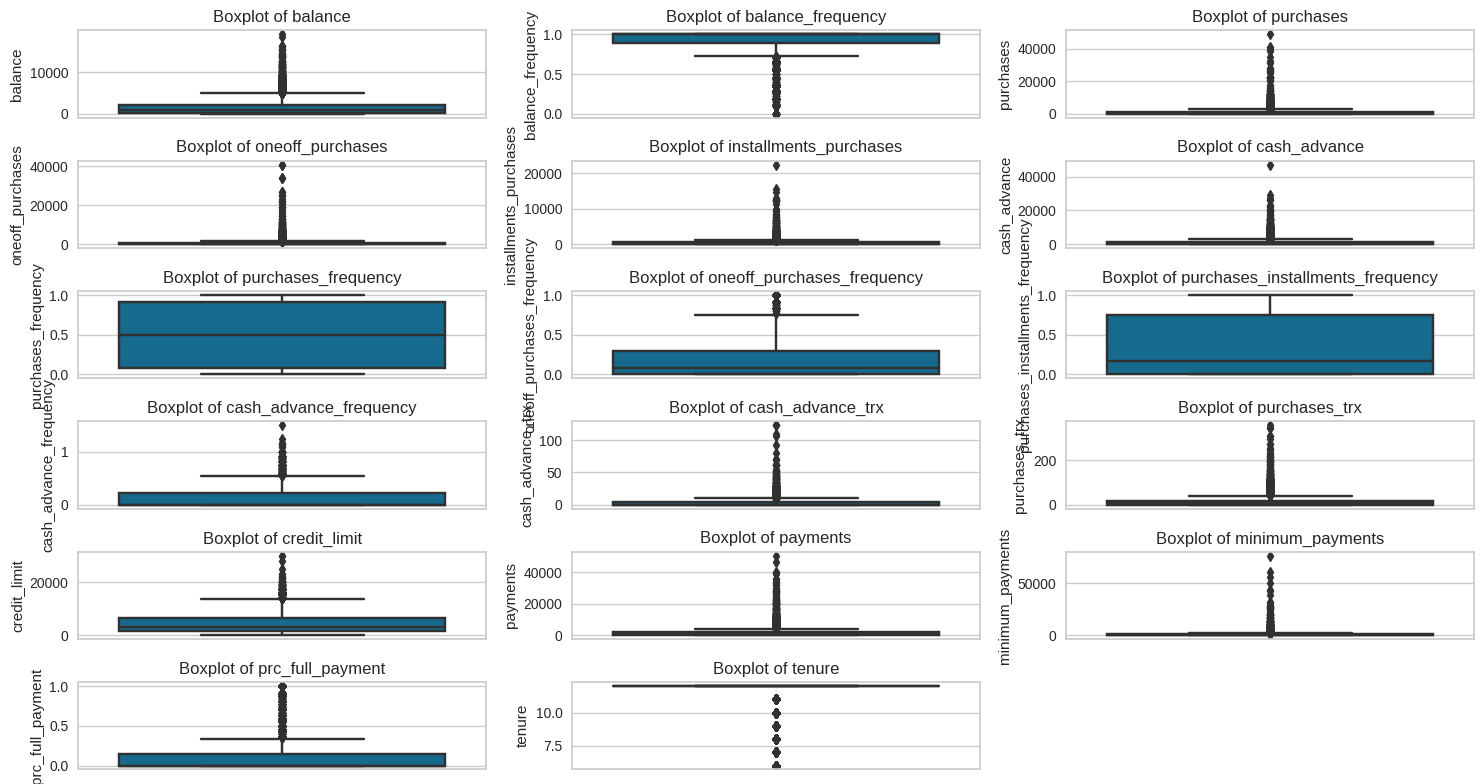

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
# Vẽ boxplot
plt.figure(figsize=(15, 8))
for i, var in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

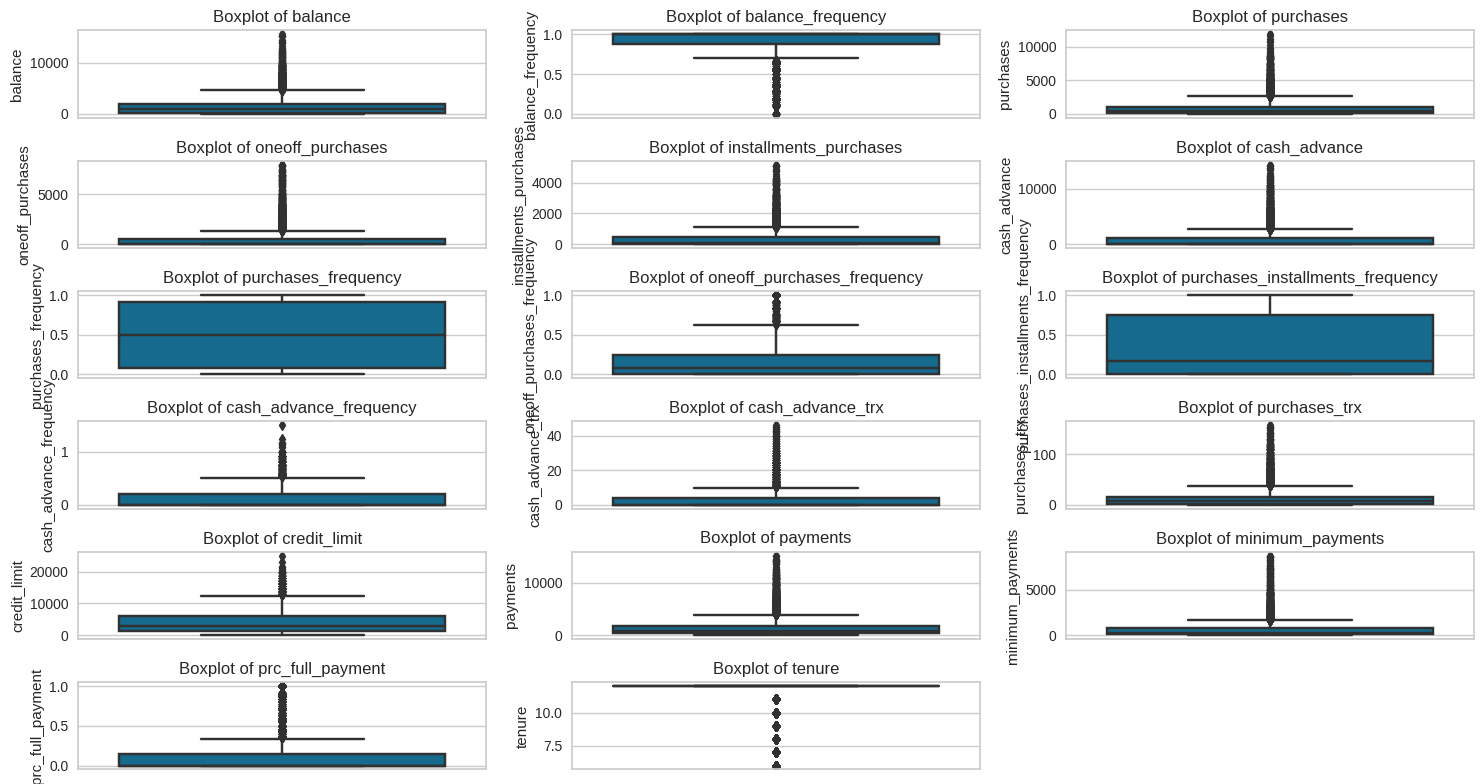

In [ ]:
def remove_outliers_iqr(df, columns_to_exclude):

    # Loại bỏ các cột được xác định để không xử lý outlier
    columns_to_process = [col for col in numeric_columns if col not in columns_to_exclude]

    for column in columns_to_process:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.98)
        IQR = Q3 - Q1

        # Xác định giới hạn cho outlier
        upper_bound = Q3 + IQR

        # Sửa lại giá trị > upper_bound và xóa dòng có giá trị đó
        df = df[df[column] <= upper_bound]

    return df

df = remove_outliers_iqr(df, columns_to_exclude=["purchases_frequency", "purchases_installments_frequency", "balance_frequency", "tenure"])

# Vẽ lại boxplot sau khi xử lý outlier
plt.figure(figsize=(15, 8))
for i, var in enumerate(df.columns):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# **3. XÂY DỰNG MÔ HÌNH**

## Tìm khoảng Threshold dựa theo Subcluster

In [ ]:
df.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000       1666.670542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [ ]:
columns_to_scale = ['balance', 'purchases', 'oneoff_purchases','installments_purchases',
                    'cash_advance','cash_advance_trx', 'credit_limit', 'payments', 'minimum_payments', 'tenure']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

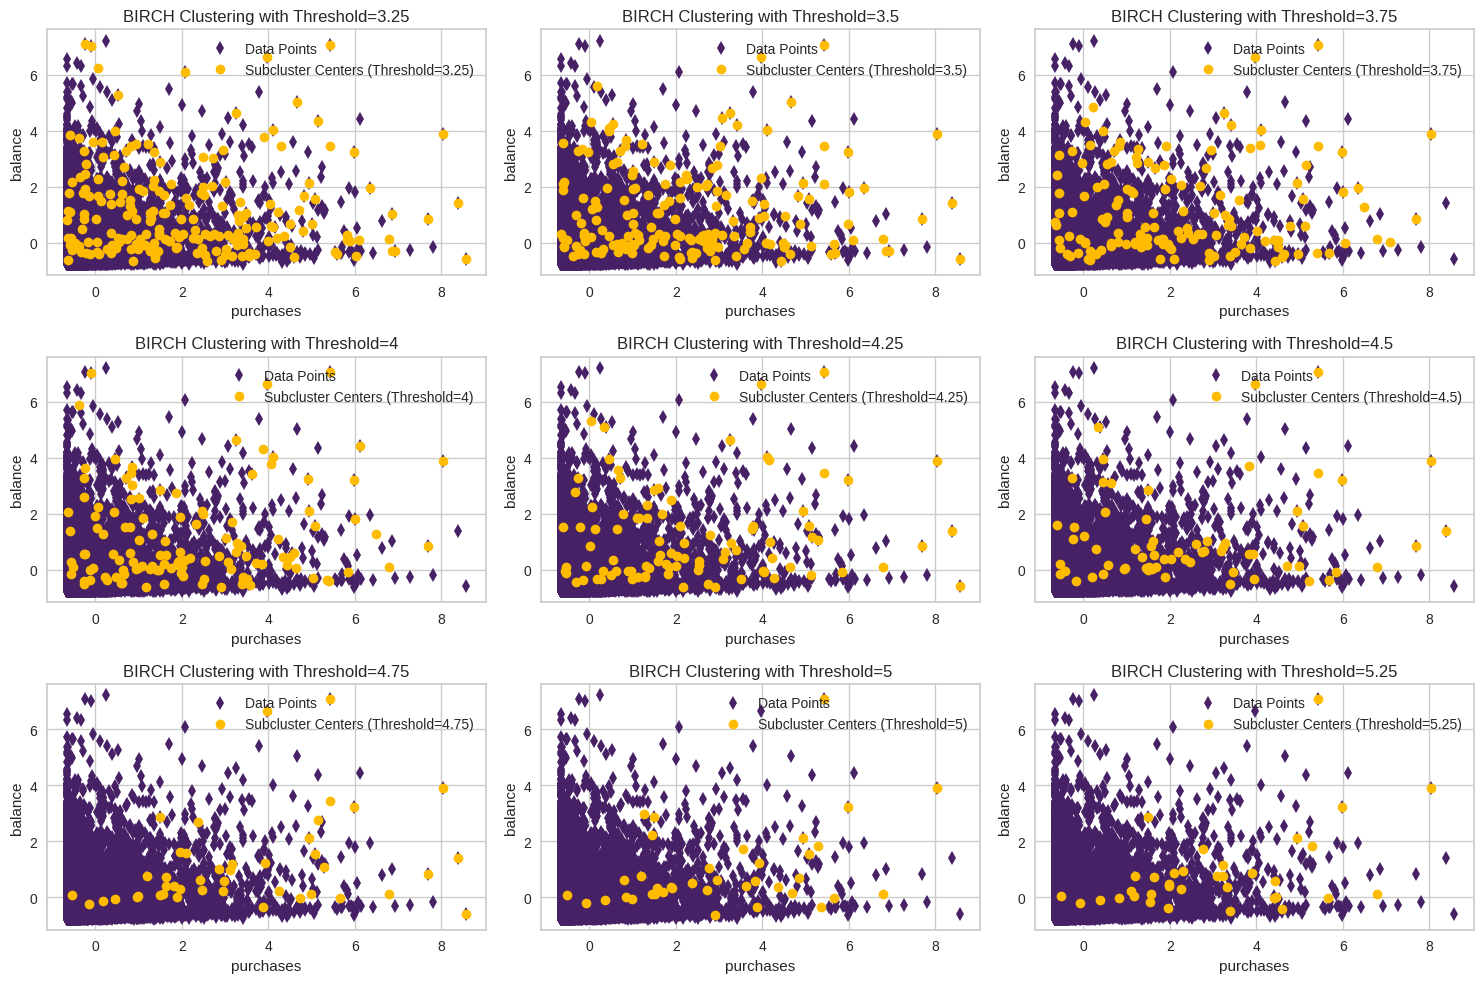

In [ ]:
from sklearn.preprocessing import StandardScaler

# # Assume df is your DataFrame
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
threshold_values = [3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 5.25]

for i, threshold_value in enumerate(threshold_values):
    brc = Birch(threshold=threshold_value)
    # Fit vào mô hình
    brc.fit(df_scaled)

    # Tạo ra tọa độ của các subcluster
    c = brc.subcluster_centers_

    # Biểu diễn dựa trên purchases và balance
    axes[i].plot(df_scaled['purchases'], df_scaled['balance'], 'd', label='Data Points')
    axes[i].plot(c[:, df.columns.get_loc('purchases')],
                 c[:, df.columns.get_loc('balance')],
                 'o', label=f'Subcluster Centers (Threshold={threshold_value})')
    axes[i].set_title(f'BIRCH Clustering with Threshold={threshold_value}')
    axes[i].set_xlabel('purchases')
    axes[i].set_ylabel('balance')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Tìm cặp Threshold và Branhching_factor tối ưu

In [ ]:
def find_best_birch_parameters(df, threshold_values, branching_factors):
    best_result = {'threshold': None, 'branching_factor': None, 'silhouette_score': -1}

    for threshold in threshold_values:
        for branching_factor in branching_factors:

            # Phân cụm sử dụng BIRCH với giá trị threshold và branching factor hiện tại
            birch_model = Birch(threshold=threshold, branching_factor=branching_factor)
            df['cluster'] = birch_model.fit_predict(df_scaled)

            # Đánh giá hiệu suất sử dụng silhouette score
            silhouette_avg = silhouette_score(df_scaled, df['cluster'])

            # Kiểm tra xem có phải là kết quả tốt nhất không
            if silhouette_avg > best_result['silhouette_score']:
                best_result['threshold'] = threshold
                best_result['branching_factor'] = branching_factor
                best_result['silhouette_score'] = silhouette_avg
    df.drop(columns='cluster',inplace=True)
    return best_result

# Sử dụng hàm để tìm giá trị tốt nhất cho cả threshold và branching factor
threshold_values_to_test = np.linspace(3.25, 4.5, 6)
branching_factors_to_test = [20,30,40,50]  # Các giá trị branching factor để thử nghiệm
best_parameters = find_best_birch_parameters(df_scaled, threshold_values_to_test, branching_factors_to_test)

print("Best Parameters:")
print("Threshold:", best_parameters['threshold'])
print("Branching Factor:", best_parameters['branching_factor'])
print("Silhouette Score:", best_parameters['silhouette_score'])

Best Parameters:
Threshold: 4.0
Branching Factor: 50
Silhouette Score: 0.7633783702273668


## Phân cụm dữ liệu và đánh giá

In [ ]:
from sklearn.metrics import calinski_harabasz_score

silhouette_coef = []
db_index_list = []
ch_index_list = []

for k in range(2, 11):
    birch = Birch(n_clusters=k, threshold=4.0, branching_factor=50)
    birch.fit(df_scaled)

    # Silhouette Score
    silhouette_score_value = silhouette_score(df_scaled, birch.labels_)
    silhouette_coef.append(silhouette_score_value)

    # Davies-Bouldin Index
    labels = birch.labels_
    db_index = davies_bouldin_score(df_scaled, labels)
    db_index_list.append(db_index)

    # Calinski-Harabasz Index
    calinski_index = calinski_harabasz_score(df_scaled, labels)
    ch_index_list.append(calinski_index)

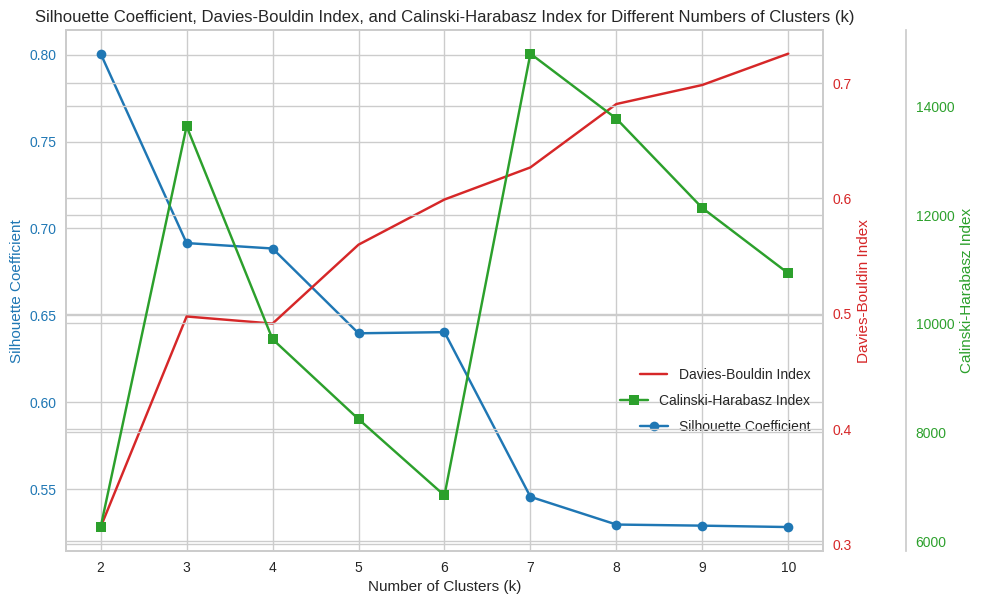

In [ ]:
# Vẽ đồ thị
fig, ax1 = plt.subplots(figsize=(10, 6))

# Silhouette Score
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Coefficient', color='tab:blue')
line1, = ax1.plot(range(2, 11), silhouette_coef, color='tab:blue', marker='o', label='Silhouette Coefficient')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='lower right',bbox_to_anchor=(1, 0.2))

# Davies-Bouldin Index
ax2 = ax1.twinx()
ax2.set_ylabel('Davies-Bouldin Index', color='tab:red')
line2, = ax2.plot(range(2, 11), db_index_list, color='tab:red', marker='x', label='Davies-Bouldin Index')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.3))

# Calinski-Harabasz Index
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Calinski-Harabasz Index', color='tab:green')
line3, = ax3.plot(range(2, 11), ch_index_list, color='tab:green', marker='s', label='Calinski-Harabasz Index')
ax3.tick_params(axis='y', labelcolor='tab:green')
ax3.legend(loc='lower right',bbox_to_anchor=(1, 0.25))

fig.tight_layout()
plt.title('Silhouette Coefficient, Davies-Bouldin Index, and Calinski-Harabasz Index for Different Numbers of Clusters (k)')
plt.show()

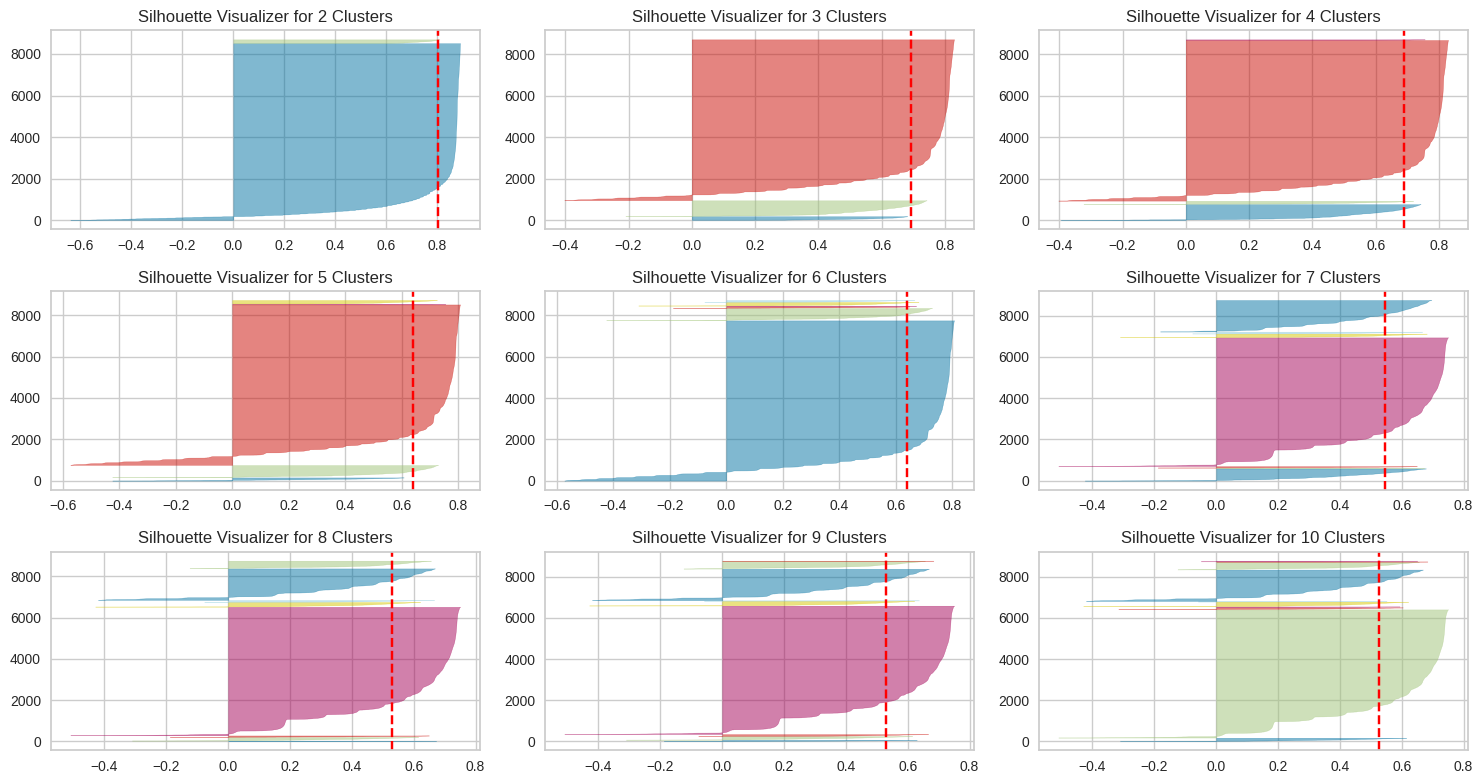

In [ ]:
cluster_range = range(2, 11)
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
ax = ax.flatten()

for i, k in enumerate(cluster_range):
    ax[i].set_title(f'Silhouette Visualizer for {k} Clusters')
    visualizer = SilhouetteVisualizer(Birch(n_clusters=k, threshold=4.0, branching_factor=50), colors='yellowbrick', ax=ax[i])
    visualizer.fit(df_scaled)
    visualizer.silhouette_score_ = silhouette_coef[i]

plt.tight_layout()
plt.show()

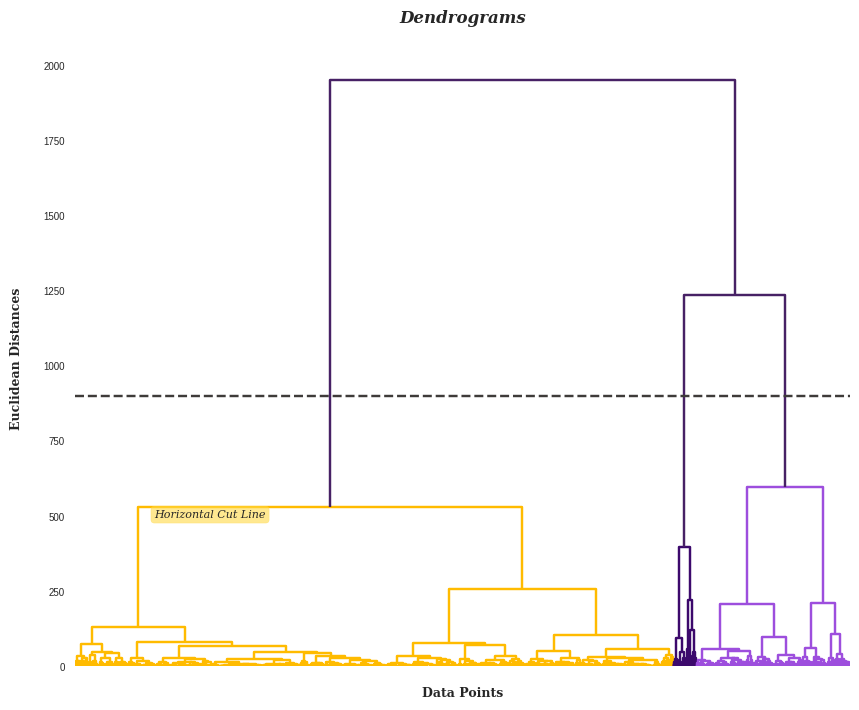

In [ ]:
from seaborn import set_palette
import scipy.cluster.hierarchy as shc

# --- Figure Settings ---
color_palette = ['#472165', '#FFBB00', '#3C096C', '#9D4EDD', '#FFE270']
set_palette(color_palette)
text_style = dict(fontweight='bold', fontfamily='serif')
ann = dict(textcoords='offset points', va='center', ha='center', fontfamily='serif', style='italic')
title = dict(fontsize=12, fontweight='bold', style='italic', fontfamily='serif')
bbox = dict(boxstyle='round', pad=0.3, color='#FFDA47', alpha=0.6)
fig = plt.figure(figsize=(10, 8))

# --- Dendrogram Plot ---
ax1 = fig.add_subplot(1, 1, 1)
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward', metric='euclidean'), color_threshold=900)
plt.axhline(y=900, color='#3E3B39', linestyle='--')
plt.xlabel('\nData Points', fontsize=9, **text_style)
plt.ylabel('Euclidean Distances\n', fontsize=9, **text_style)
plt.annotate('Horizontal Cut Line', xy=(15000, 500), xytext=(1, 1), fontsize=8, bbox=bbox, **ann)
plt.tick_params(labelbottom=False)
for spine in ax1.spines.values():
    spine.set_color('None')
plt.grid(axis='both', alpha=0)
plt.tick_params(labelsize=7)
plt.title('Dendrograms\n', **title)

plt.show()

## Áp dụng vào bộ dữ liệu và nhận xét:

In [ ]:
import time
start_time = time.time()

birch_model = Birch(n_clusters=3, threshold=4, branching_factor=50)
birch_labels = birch_model.fit_predict(df_scaled)

end_time = time.time()
elapsed_time1 = end_time - start_time

In [ ]:
df_c = df.copy()

In [ ]:
df_c['cluster'] = birch_labels

In [ ]:
df_c['cluster'].value_counts()

2    7749
1     759
0     176
Name: cluster, dtype: int64

Biễu diễn theo PCA

In [ ]:
from sklearn.decomposition import PCA

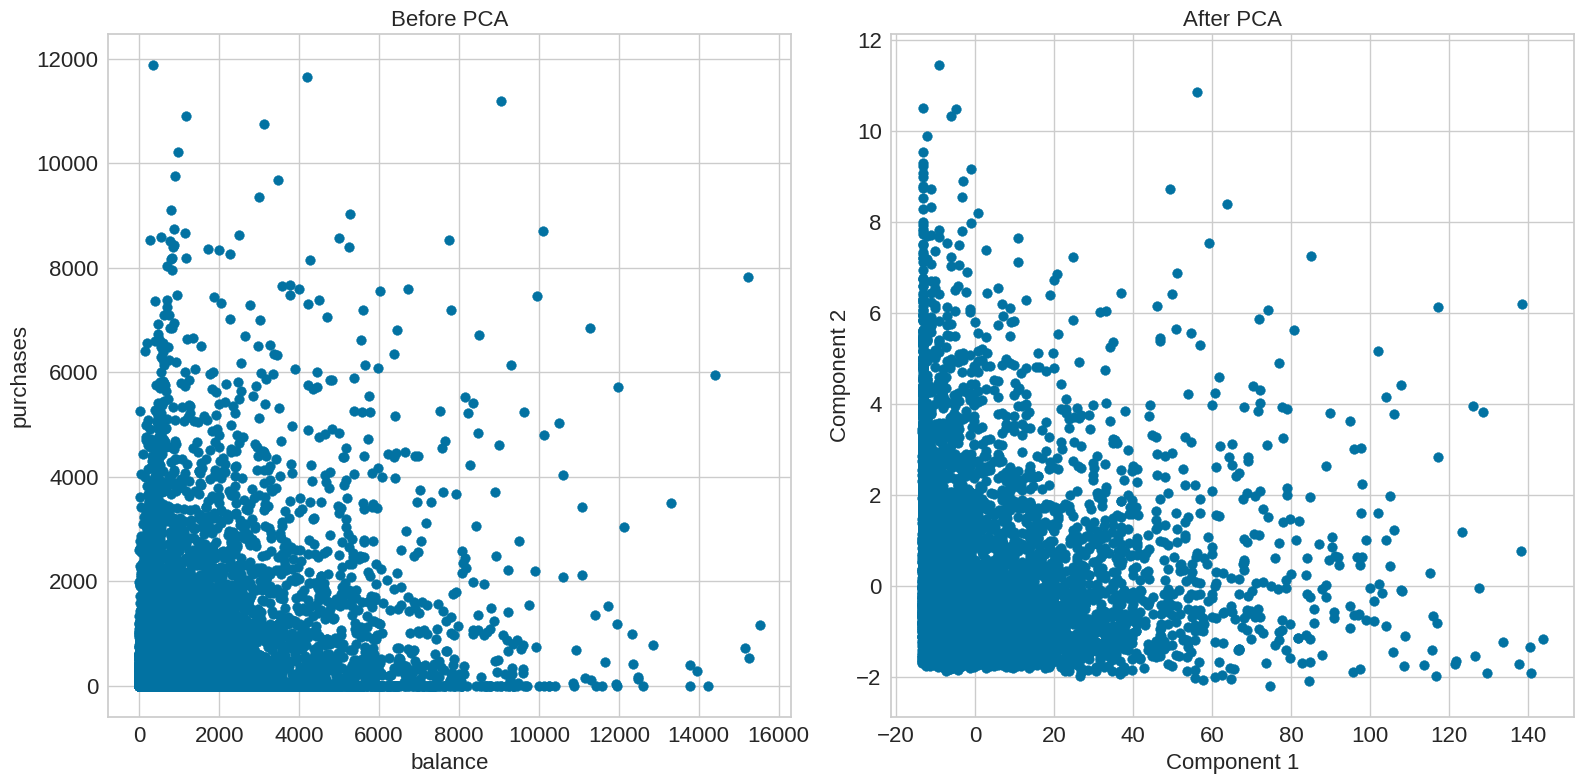

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(df_c['balance'], df_c['purchases'])
plt.title('Before PCA', fontsize = 16)
plt.xlabel('balance', fontsize = 16)
plt.ylabel('purchases', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

 # After PCA
plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.title('After PCA', fontsize = 16)
plt.xlabel('Component 1', fontsize = 16)

plt.ylabel('Component 2', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.tight_layout()
plt.show()

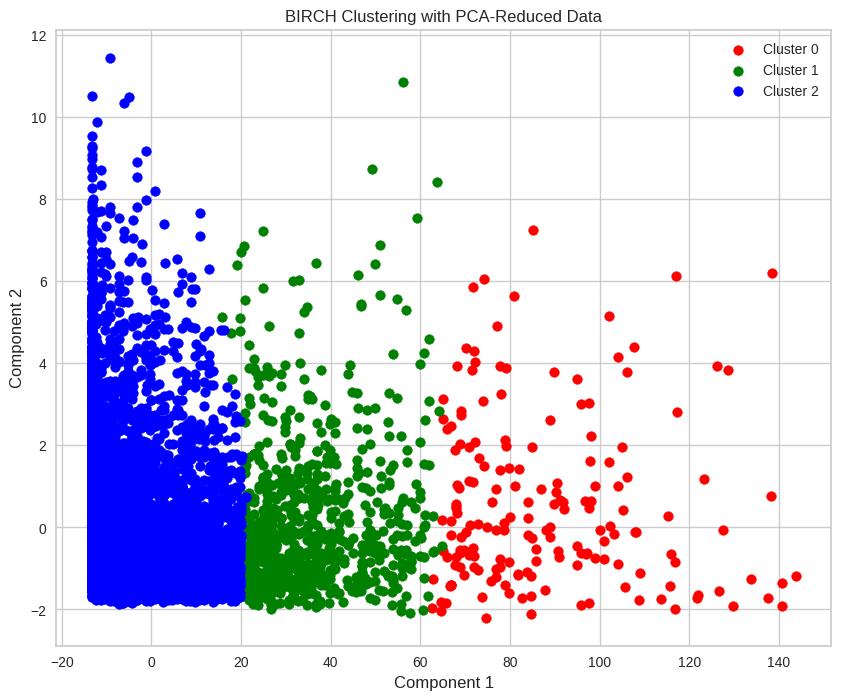

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

colors = ['red', 'green', 'blue']

plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_points = df_pca[birch_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('BIRCH Clustering with PCA-Reduced Data')
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)
plt.legend()
plt.show()

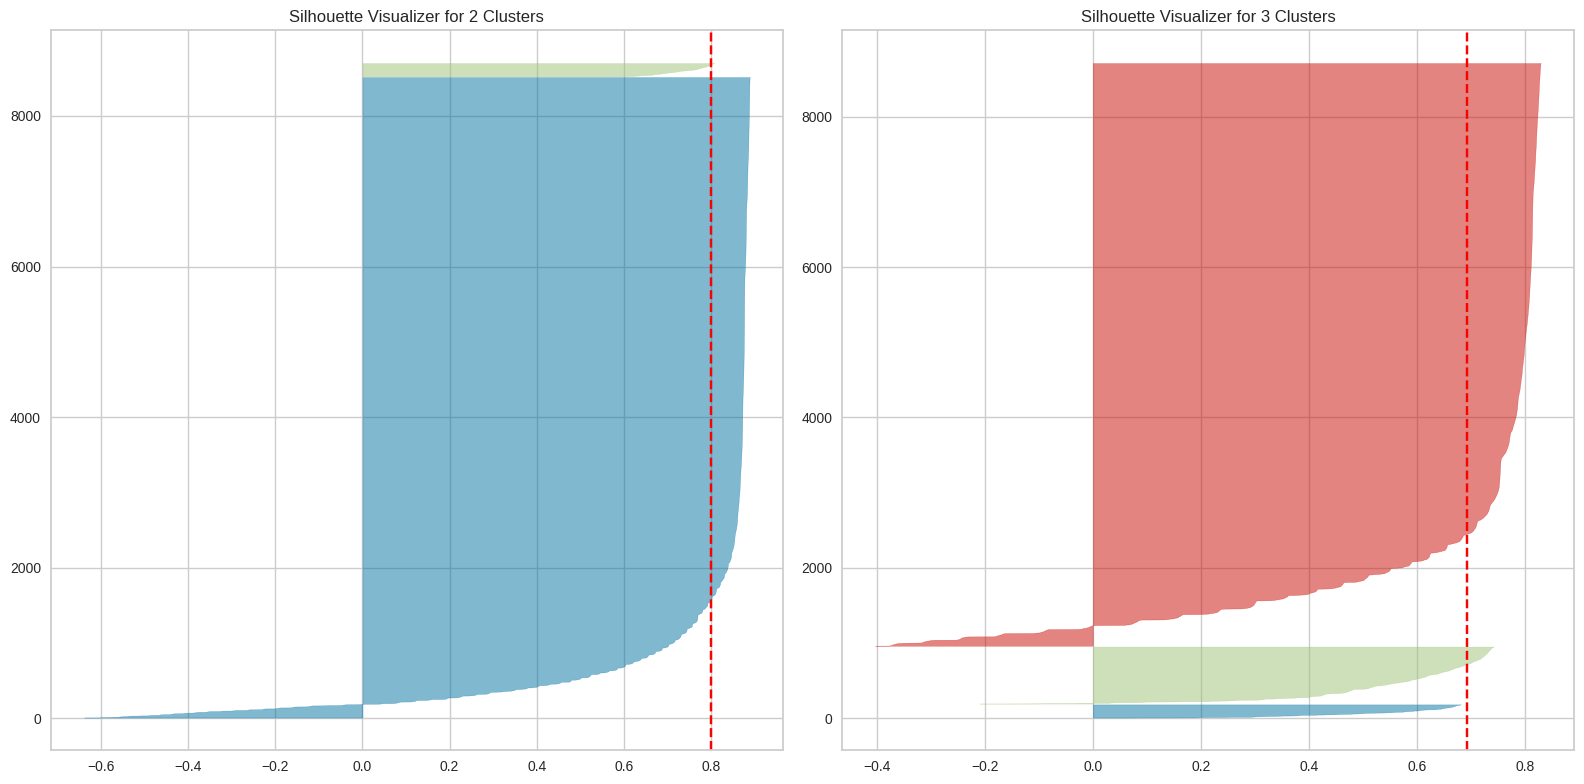

In [ ]:
nbClusters = range(2, 4)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for i, k in enumerate(nbClusters):
    ax[i].set_title(f'Silhouette Visualizer for {k} Clusters')
    visualizer = SilhouetteVisualizer(Birch(n_clusters=k, threshold=4.0, branching_factor=50), colors='yellowbrick', ax=ax[i])
    visualizer.fit(df_scaled)
    visualizer.silhouette_score_ = silhouette_coef[i]

plt.tight_layout()
plt.show()

# HAC

In [ ]:
start_time = time.time()

hac_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hac_labels = hac_model.fit_predict(df_scaled)

end_time = time.time()
elapsed_time2 = end_time - start_time

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
df_c1 = df.copy()

In [ ]:
df_c1['cluster'] = hac_labels

In [ ]:
df_c1['cluster'].value_counts()

1    6715
0    1709
2     260
Name: cluster, dtype: int64

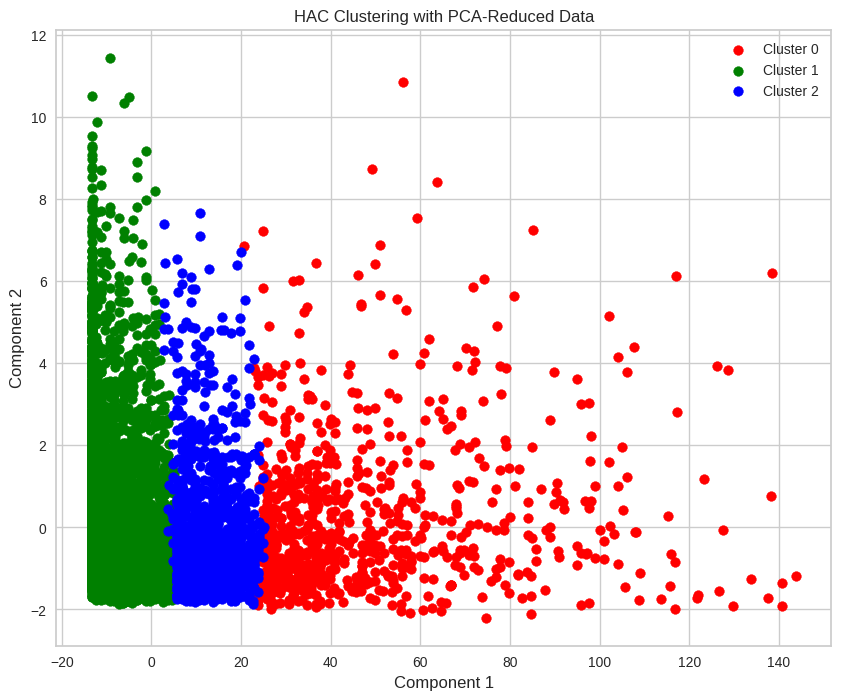

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_points = df_pca[hac_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f'Cluster {cluster}')

plt.title('HAC Clustering with PCA-Reduced Data')
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from current font.



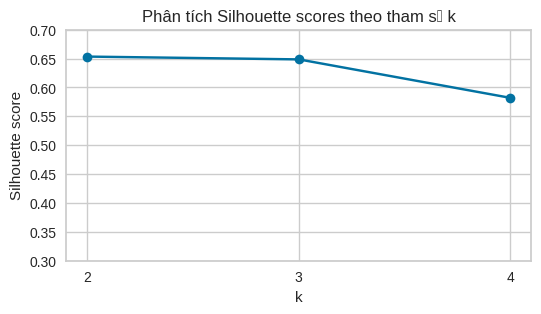

Giá trị tối ưu cho tham số: k = 2


In [ ]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 5) # Lưu ý: (k >= 2) vì cần tính khoảng cách từ xi đến nearest cluster
silhouettes = []
for k in nbClusters:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(df_scaled)
    silhouettes.append(silhouette_score(df_scaled, model.fit_predict(df_scaled), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích Silhouette scores theo tham số k')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

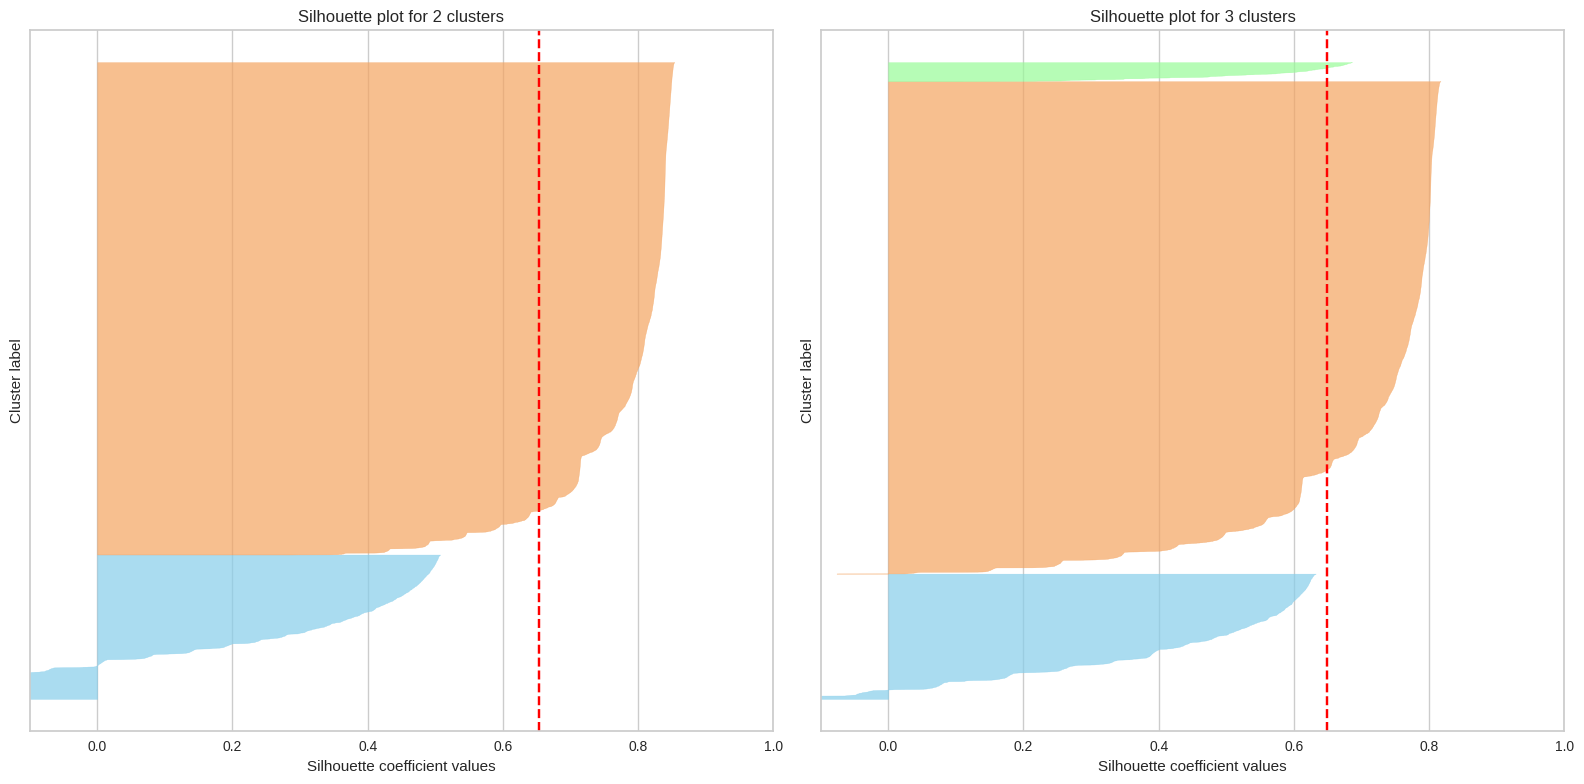

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

nbClusters = range(2, 4)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
color_palette = ['skyblue', 'sandybrown', 'palegreen', 'salmon', 'plum']

for i, k in enumerate(nbClusters):
    clusterer = AgglomerativeClustering(n_clusters=k)
    cluster_labels = clusterer.fit_predict(df_scaled)

    silhouette_vals = silhouette_samples(df_scaled, cluster_labels)
    avg_score = silhouette_score(df_scaled, cluster_labels)

    y_lower, y_upper = 0, 0
    yticks = []
    for j, color in zip(range(k), color_palette):
        jth_cluster_silhouette_vals = silhouette_vals[cluster_labels == j]
        jth_cluster_silhouette_vals.sort()
        y_upper += len(jth_cluster_silhouette_vals)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper),
                            0, jth_cluster_silhouette_vals,
                            facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower = y_upper

    ax[i].set_title(f'Silhouette plot for {k} clusters')
    ax[i].set_yticks([])
    ax[i].set_xlim([-0.1, 1])
    ax[i].set_xlabel('Silhouette coefficient values')
    ax[i].set_ylabel('Cluster label')
    ax[i].axvline(x=avg_score, color="red", linestyle="--")

plt.tight_layout()
plt.show()


# K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

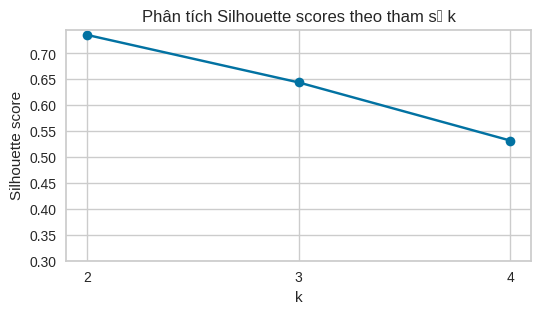

Giá trị tối ưu cho tham số: k = 2


In [ ]:
## Phân tích Silhouette scores theo giá trị của tham số k
nbClusters  = range(2, 5) # Lưu ý: (k >= 2) vì cần tính khoảng cách từ xi đến nearest cluster
silhouettes = []
for k in nbClusters:
    model = KMeans(n_clusters = k)
    model.fit(df_scaled)
    silhouettes.append(silhouette_score(df_scaled, model.fit_predict(df_scaled), metric = 'euclidean'))

plt.figure(figsize = (6, 3))
plt.plot(nbClusters, silhouettes, 'bo-')
plt.xlabel('k')
plt.xticks(nbClusters)
plt.ylabel('Silhouette score')
plt.yticks(np.arange(0.3, 0.75, 0.05))
plt.title('Phân tích Silhouette scores theo tham số k')

plt.show()
print(f'Giá trị tối ưu cho tham số: k = {nbClusters[np.argmax(silhouettes)]}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



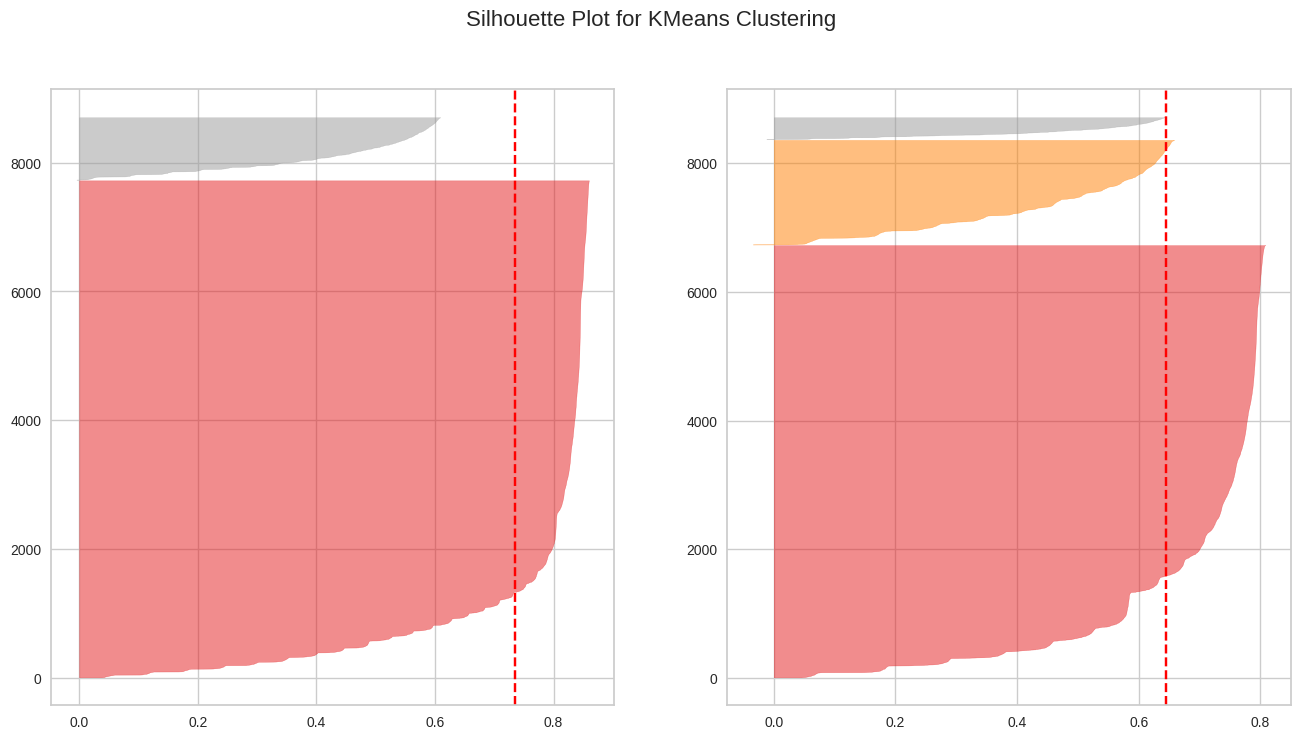

In [ ]:
nbClusters = range(2, 4)
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

for k in nbClusters:
    model = KMeans(n_clusters=k, random_state=42)

    row, col = divmod(k - 2, 2)

    visualizer = SilhouetteVisualizer(model, ax=ax[col])
    visualizer.fit(df_scaled)

plt.suptitle('Silhouette Plot for KMeans Clustering', fontsize=16)
plt.show()

In [ ]:
start_time = time.time()

kmeans_md = KMeans(n_clusters = 3, n_init = 20).fit(df_scaled)
df_scaled['cluster'] = kmeans_md.labels_
pd.set_option('display.max_columns', None)

end_time = time.time()
elapsed_time3 = end_time - start_time

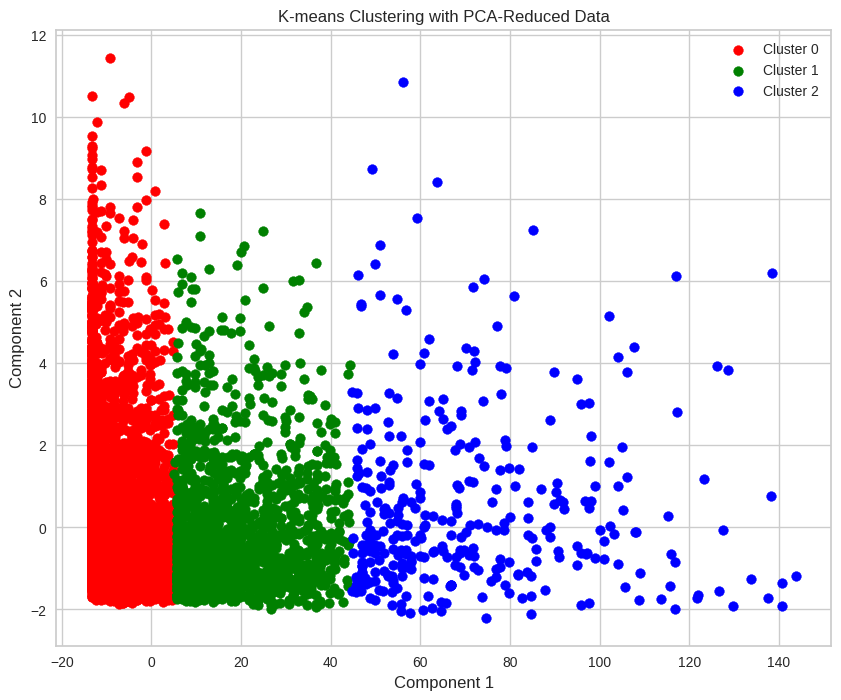

In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Step 3: Plot the clusters.
colors = ['red', 'green', 'blue']  # You can choose different colors

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(3):
    cluster_points = df_pca[kmeans_md.labels_ == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[cluster], label=f'Cluster {cluster}')

# Additional plot formatting
plt.title('K-means Clustering with PCA-Reduced Data')
plt.xlabel('Component 1', fontsize = 12)
plt.ylabel('Component 2', fontsize = 12)
plt.legend()
plt.show()

In [ ]:
print("Thời gian chạy BIRCH:", elapsed_time1)
print("Thời gian chạy HAC:", elapsed_time2)
print("Thời gian chạy K-Means:", elapsed_time3)

Thời gian chạy BIRCH: 0.5237371921539307
Thời gian chạy HAC: 7.741003513336182
Thời gian chạy K-Means: 2.1560778617858887


# Đánh giá sau khi phân cụm

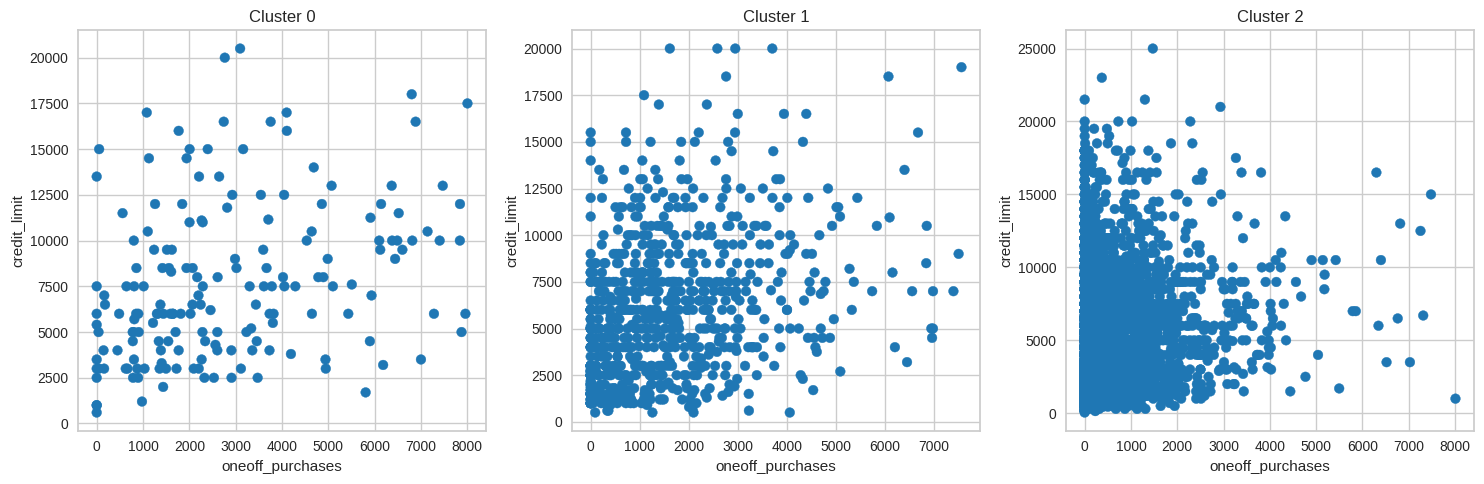

In [ ]:
import matplotlib.colors as mcolors
import matplotlib
# Set up colors for clusters
colors = list(mcolors.TABLEAU_COLORS.values())

# Create subplots for each cluster
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for cluster_num in range(3):
    cluster_data = df_c[df_c['cluster'] == cluster_num]

    # Plot scatter plot for the current cluster
    axes[cluster_num].scatter(cluster_data['oneoff_purchases'], cluster_data['credit_limit'], c=cluster_data['cluster'], cmap=matplotlib.colors.ListedColormap(colors))
    axes[cluster_num].set_xlabel("oneoff_purchases")
    axes[cluster_num].set_ylabel("credit_limit")
    axes[cluster_num].set_title(f'Cluster {cluster_num}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

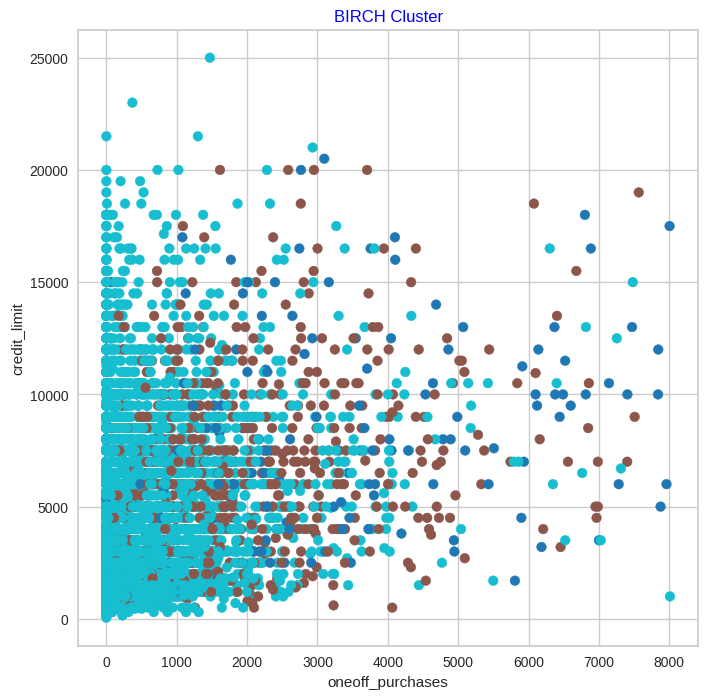

In [ ]:
plt.figure(figsize = (8, 8))
plt.scatter(df_c['oneoff_purchases'], df_c['credit_limit'], c = df_c.cluster,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("oneoff_purchases")
plt.ylabel("credit_limit")
plt.title("BIRCH Cluster", color = "blue")
plt.show()

In [ ]:
df_profile_overall = pd.DataFrame()

df_cluster_summary = df_c.groupby('cluster').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

# --- Combining Both Data Frame ---
print('.: Summarize of Each Clusters :.')
print('*' * 33)
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()
df_profile.style.background_gradient(cmap='YlOrBr').hide_index()

.: Summarize of Each Clusters :.
*********************************


<ipython-input-151-bc8814cde7c4>:10: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`

